# Assignment 3

In [1]:
#importing required modules(all modules allowed by sir)

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data(provided in the assignment)

data=pd.read_csv(r'BankNote_Authentication.csv')

## Q1.a  :  perceptron algorithm 

In [3]:
#function for perceptron algorithm

def stochasticsubsgd(x,y,epoches):
    
    #adding the bias as a feature to input vector 'x' with value=1
    
    x['bias']=1
    
    #random initialization of weight vector
    
    weights = np.random.randn(1,x.shape[1]) 
    
    #storing the indexes in a list
    
    indexes=[j for j in range(len(x))]
    
    #repeating until the no of epoches completed or until convergence 
    
    crctly_classified=0
    
    for i in range(epoches*len(x)):
        
        #initializing learning rate=1
        
        lrate=1
        
        #choosing a random index from the list of indexes
        
        random_num = random.choice(indexes)
        
        #getting the x and y values corresponding to that random index (getting a random point )
        
        point_x=x.iloc[random_num,:]
        point_y=y.iloc[random_num]
        
        #checking condition whether present model wrongly classifies the current data point
        
        if point_y*(np.dot(weights,point_x))<0:
            
            #updating the weight vector if the point is wrongly classified
            
            weights=weights+lrate*np.array(point_y*point_x)
            
            #if the weights are updated (it becomes a new model) so making crctly_classified as 0 
            
            crctly_classified=0
            
        else :
            
            #if the point is correctly classified then incrementing crctly_classified
            
            crctly_classified+=1
         
        #if the correctly classified points by a model == no of points (convergence condition)
        
        if crctly_classified==len(x):
            
            break
            
    #returning the weight vector
    
    return weights
    

# Q1.b  : functions to make predictions using the  perceptron algorithm

In [4]:
#function to make prections when given weight vector and input vector

def prediction(x,weights):
    
    #adding the bias as a feature to input with value=1
    
    x['bias']=1
    
    #storing the predicted values in y_hat
    
    y_hat=np.dot(x,weights.transpose())
    
    #looping through the ouput vector
    
    for i in range(len(y_hat)):
        
        #making the output value as -1 if that point is on the negative side of the hyperplane
        
        if y_hat[i]<=0:
            y_hat[i]=-1
            
        #making the output value as +1 if that point is on the positive side of the hyperplane
        
        else:
            y_hat[i]=1
    
    #returning the predicted values
    
    return y_hat

In [5]:
#function to find the error

def error(y,y_hat):
    
    #converting into numpy array
    
    y=np.array(y)
    
    #varible to store the no of wrongly classified points
    
    count=0
    
    #looping through the output vector
    
    for i in range(len(y)):
        
        #if the output and predicted output are not equal then increamenting count by 1
        
        if y[i]!=y_hat[i]:
            count+=1
            
    #returning the ratio of wrongly classified points to the total no of points
    
    return count/len(y)

### checking for  null  values

In [6]:
#printing the no of null values in each of the column

data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

as you can see there are no null values in our data

### Finding anomalous data(using box plot)

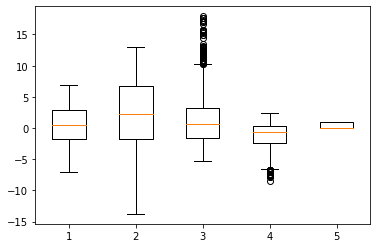

In [7]:
#boxplot of our data featres to find the anamolies or outliers
b=(plt.boxplot(data))

all the values of columns that are black in color  are anamolus values

In [8]:
#removing the anomalies or outliers data

data=data[data[data.columns[2]]<=9]
data=data[data[data.columns[3]]>=-5.6]

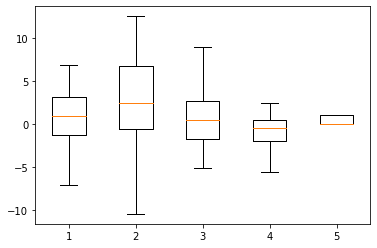

In [9]:
#boxplot of our data featres to show that anamolies are removed

b=(plt.boxplot(data))

as you can see there are no more anamolous values

### changing output class representation from 0 to -1

In [10]:
#perceptron algo given by sir in slide 7 is for classification of data points to classes either  +1 or -1
#but given data has classes +1 and 0
#so we are just changing the representation from 0 to -1


#looping through each data point

for i in range(len(data)):
    
    #if the output is of class 0
    
    if data.iloc[i,-1]==0:
        
        #changing it to class -1
        
        data.iloc[i,-1]=-1

In [11]:
#printing the no of data points belonging to each output class

print(data['class'].value_counts())

-1    734
 1    488
Name: class, dtype: int64


### performing min-max normalization

In [12]:
#storing the max value of each column

max_values=np.max(data)

#storing the min value of each column

min_values=np.min(data)

#doing min- max normalization for each input column

for col_num in range(data.shape[1]-1):
    data[data.columns[col_num]]=(data[data.columns[col_num]]-min_values[col_num])/(max_values[col_num]-min_values[col_num])

# Q1.C : reporting  cross-validated test set error

In [13]:
df=data

In [14]:
#DATA SPLITTING

np.random.seed(1)

#TEST-TRAIN SPLIT

mask=np.random.rand(len(df))<0.8
train_df=df[mask]
test_df=df[~mask]


In [15]:
#FIRST DIVIDING TRAIN DATA INTO 2 EQUAL PARTS

part1=train_df.sample(frac=0.5)
part2=train_df.drop(part1.index)

#NOW FURTHER DIVIDING THE DIVIDED PARTS INTO 2 SO THAT WE GET 4 PARTS

part11=part1.sample(frac=0.5)
part12=part1.drop(part11.index)
part21=part2.sample(frac=0.5)
part22=part2.drop(part21.index)

In [16]:
#making 4 differet train sets (by leaving out one of the parts in each set) for 4 fold cross validation

train123=pd.concat([part11,part12,part21])
train124=pd.concat([part11,part12,part22])
train134=pd.concat([part11,part21,part22])
train234=pd.concat([part12,part21,part22])

In [17]:
#DEFINING CROSS VALIDATION FUNCTION

def cross_val(epoches):

    
    #GIVING THE TRAIN SET AND EPOCHES AS INPUT TO STOCHASTICSUBSGD METHOD i.e PERCEPTRON ALGORITHM
    #GIVING THE WEIGHTS RETURNED BY STOCHASTICSUBSGD METHOD AND LEFT OVER PART FROM THAT TRAIN SET AS INPUT TO PREDICTION METHOD
    #FINDING THE ERROR USING error function
    
    #REPEATING THIS FOR EACH OF 4 DIFF TRAIN SETS
    
    w1=stochasticsubsgd(train123.iloc[:,:-1],train123.iloc[:,-1],epoches)
    y_hat1=prediction(part22.iloc[:,:-1],w1)
    error1=error(part22.iloc[:,-1],y_hat1)
    
    w2=stochasticsubsgd(train124.iloc[:,:-1],train124.iloc[:,-1],epoches)
    y_hat2=prediction(part21.iloc[:,:-1],w2)
    error2=error(part21.iloc[:,-1],y_hat2)
    
    w3=stochasticsubsgd(train134.iloc[:,:-1],train134.iloc[:,-1],epoches)
    y_hat3=prediction(part12.iloc[:,:-1],w3)
    error3=error(part12.iloc[:,-1],y_hat3)
    
    w4=stochasticsubsgd(train234.iloc[:,:-1],train234.iloc[:,-1],epoches)
    y_hat4=prediction(part11.iloc[:,:-1],w4)
    error4=error(part11.iloc[:,-1],y_hat4)
    
    
    #CALCULATING THE AVG ERROR 
    
    avgerror=(error1+error2+error3+error4)/4
    
    #RETURNING THE ERROR
    
    return avgerror

In [18]:
#FINDING THE BEST MODEL (HYPERPARAMETER:NO OF EPOCHES)

best_epoches=0
best_error=1000000

#LOOPING THROUGH DIFFERENT EPOCHES VALUES

for i in range(10,100,10):
    avgerror=cross_val(i)
    if avgerror<best_error:
        best_error=avgerror
        best_epoches=i
        
#PRINTING THE OPTIMAL EPOCHES NUMBER

print('OPTIMAL EPOCHES VALUE USING 4 FOLD CROSS VALIDATION IS',best_epoches,'THE  ERROR IS',best_error*100,'%')
    

OPTIMAL EPOCHES VALUE USING 4 FOLD CROSS VALIDATION IS 80 THE  ERROR IS 0.3073770491803279 %


# Q1.d : reporting  F1 score on the held out set for  best model

In [19]:
#TRAINING THE MODEL FOR BEST EPOCHES VALUE

w=stochasticsubsgd(train_df.iloc[:,:-1],train_df.iloc[:,-1],best_epoches)

#STROING THE PREDICTED OUTPUTS OF TEST DATA ON THE BEST MODEL

y_hat=prediction(test_df.iloc[:,:-1],w)
y=np.array(test_df.iloc[:,-1])

In [20]:
#INITIALIZING THE TRUE POSITIVE ,TRUE NEGATIVE , FALSE POSITIVE AND FALSE NEGATIVE VALUES

TP=0
TN=0
FP=0
FN=0

In [21]:
#CALCULATING THE TOTAL TRUE POSITIVE ,TRUE NEGATIVE , FALSE POSITIVE AND FALSE NEGATIVE VALUES

for i in range(len(y)):
    if y[i]==1 and y_hat[i]==1:
        TP+=1
    elif y[i]==1 and y_hat[i]!=1:
        FN+=1
    elif y[i]==-1 and y_hat[i]==-1:
        TN+=1
    else:
        FP+=1

In [22]:
print(TP,TN,FP,FN)

98 147 0 1


In [23]:
#CALCULATING PRECISION AND RECALL FROM TRUE POSITIVE ,TRUE NEGATIVE , FALSE POSITIVE AND FALSE NEGATIVE VALUES

PRE=TP/(TP+FP)
REC=TP/(TP+FN)

#CALCULATING F1 SCORE FROM PRECISION AND RECALL

F1=(2*PRE*REC)/(PRE+REC)

In [24]:
print('F1 score on held out set is :', F1)

F1 score on held out set is : 0.9949238578680203


# Q2.a : Calculating and Plotting pdf of analytic posterior

# Derivation
### Likelihood of n observations iid N($\mu$,${\sigma}^{2}$)
### $f(y_1,y_2,..,y_n|\mu,\sigma^2)= \prod_{i=1}^{n}\frac{1}{\sqrt{2\pi{\sigma}}^2} e^\left( \frac{-1}{2\sigma^2}(y_i-\mu)^2 \right)$
###                $\hspace{5.15cm}= \left(\frac{-1}{\sqrt{2\pi\sigma^2}}\right)^2 e^\left(\frac{-1}{2\sigma^2}\sum_{i=1}^{n}(y_i-\mu)^2\right)$
###                $\hspace{5.15cm}= \alpha e^\left(\frac{-1}{2\sigma^2} \sum_{i=1}^{n}({y_i}^2+\mu^2-2\mu y_i)\right)$

###                $\hspace{5.15cm}=e^\left(\frac{-1}{2\sigma^2}(\sum_{i=1}^{n}{y_i}^2+n \mu^2 -2\mu n \bar{y})\right)$

###                $\hspace{5.15cm}=e^\left(\frac{-n}{2\sigma^2}(\mu^2 -2\mu\bar{y}+\frac{1}{n}\sum_{i=1}^{n}{y_i}^2)\right)$

###                $\hspace{5.15cm}=e^\left(\frac{-1}{2{\sigma_l}^2}(\mu - \mu_l)^2\right)$

###                $\hspace{5.15cm}=e^\left(\frac{-1}{2{\sigma_l}^2}(\mu^2 - 2\mu \mu_l + {\mu_l}^2)\right)$

### $\hspace{2cm} \mu_l = \bar{y}, \hspace{1cm}\frac{-n}{2\sigma^2}=\frac{-1}{2\sigma^2}$

### $\hspace{4.85cm} {\sigma_l}^2=\frac{\sigma^2}{n}$

## $\hspace{4.85cm} ~N\left(\bar{y},\frac{\sigma^2}{n}\right)$

### let prior be : $N(m,s^2)$
###  Normal Prior * Normal Liklihood will be a Normal Distribution $N\left(\mu_n,{\sigma_n}^2 \right)$
### As we know $s^2$ and $\sigma^2$ ,we can ignore the constant term
### $\hspace{3cm}\left( \frac{1}{\sqrt{2 \pi \frac{\sigma^2}{n}}} \right)^n * \left( \frac{1}{\sqrt{2 \pi s^2}} \right)$
### $g(\mu|y_1,y_2,...,y_n)\hspace{1cm}\alpha \hspace{1cm}g(\mu)*f(y_1,y_2,..,y_n|\mu)$

### $\hspace{5.3cm}\alpha \hspace{0.5cm} exp\left( \frac{-1}{2s^2}(\mu - m)^2 \right) * exp\left( \frac{-n}{2\sigma^2}(\mu - \bar{y})^2 \right)$

### $\hspace{5.3cm}= \hspace{0.5cm} exp\left( \frac{-1}{2s^2}(\mu^2 + m^2 -2\mu m) \right) * exp\left( \frac{-n}{2\sigma^2}(\mu^2 + \bar{y}^2 - 2\mu \bar{y}) \right)$

### $\hspace{5.3cm}= \hspace{0.5cm} exp\left( \frac{-1}{2} \left( \mu^2 \left(\frac{1}{s^2}+\frac{n}{\sigma^2}\right)-2\mu\left( \frac{m}{s^2}+\frac{n\bar{y}}{\sigma^2}\right)+\frac{m^2}{s^2}+\frac{\bar{y}^2}{\sigma^2}\right)  \right)$

### we expect the result in the form $exp\left( \frac{-1}{2{\sigma_n}^2}(\mu^2 + {\mu_n}^2 -2 \mu \mu_n)\right)$

### $\hspace{2cm} \frac{-1}{2{\sigma_n}^2}\mu^2 = \frac{-\mu^2}{2} \left( \frac{1}{s^2}+\frac{n}{\sigma^2}\right) => \frac{1}{{\sigma_n}^2}=\frac{1}{s^2}+\frac{n}{\sigma^2} $

### $\hspace{2cm} \frac{1}{{\sigma_n}^2}=\frac{\sigma^2+s^2n}{\sigma^2s^2}=>{\sigma_n}^2=\frac{\sigma^2s^2}{\sigma^2+s^2n}$

### $\hspace{2cm} \frac{2\mu\mu_n}{2{\sigma_n}^2}=\frac{\mu\mu_n}{{\sigma_n}^2}=\mu\left( \frac{m}{s^2}+\frac{n\bar{y}}{\sigma^2} \right)$

### $\hspace{2cm}\frac{\mu_n}{{\sigma_n}^2}=\frac{m\sigma^2+n\bar{y}s^2}{\sigma^2s^2}$

### $\hspace{2cm}\mu_n={\sigma_n}^2\left( \frac{m\sigma^2+n\bar{y}s^2}{\sigma^2s^2} \right)=\frac{\sigma^2s^2}{\sigma^2+s^2n}\left(\frac{m\sigma^2+n\bar{y}s^2}{\sigma^2s^2} \right)$

### $\hspace{2.8cm}= \frac{m\sigma^2+n\bar{y}s^2}{\sigma^2+s^2n}=\frac{\sigma^2}{\sigma^2+s^2n}m+\frac{s^2}{\sigma^2+s^2n}n\bar{y}$

### $\hspace{2cm}\mu_n=\frac{\sigma^2}{\sigma^2+s^2n}m+\frac{s^2}{\sigma^2+s^2n}n\bar{y}$

### The posterior Normal Distribution is $N\left( \frac{\sigma^2}{\sigma^2+s^2n}m+\frac{s^2}{\sigma^2+s^2n}n\bar{y}, \frac{\sigma^2s^2}{\sigma^2+s^2n}\right)$

In [25]:
#generating 50 new data samples from a normal distribution with mean 10 and SD 5

mu=10
sigma=5
n=50
data= np.random.normal(mu,sigma,n)

In [26]:
#calculating the mean and sd for likelihood distribution(normal) from data(the derivation is above)

lh_mu=np.mean(data)
lh_sigma=np.sqrt(sigma**2/n)

In [27]:
#assigning the mean and sd for prior distribution(normal) (this is given in question)

p_mu=25
p_sigma=5

In [28]:
#calculating then mean and sd for posterior distribution (normal) using conjuacy
#derivation of posterior mean and sd interms of prior and likelihood mean and sd are derived above

po_mu=(p_mu*(lh_sigma**2)+lh_mu*(p_sigma**2))/(lh_sigma**2+p_sigma**2)
po_sigma=np.sqrt(((lh_sigma**2)*(p_sigma**2))/((lh_sigma**2)+(p_sigma**2)))

In [29]:
#defining a pdf function to return probablity values of x for the data sent

def pdf(x,data):
    sd=np.sqrt(np.var(data))
    mean=np.mean(data)
    return 1/(sd * np.sqrt(2 * np.pi)) *np.exp( - (x - mean)**2 / (2 * sd**2) )

In [30]:
#function to calculate the Bayesian posterior probability

def posterior(x):
    return 1/(po_sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - po_mu)**2 / (2 * po_sigma**2) )

In [31]:
#generating sample data from mean and sd of likelihood,prior,posterior respectively(for plotting pdfs)

data1= np.random.normal(lh_mu,lh_sigma,500)
data2= np.random.normal(p_mu,p_sigma,500)
data3= np.random.normal(po_mu,po_sigma,500)

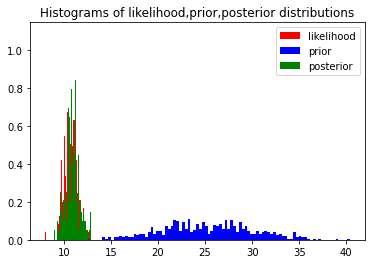

In [32]:
#plotting the histograms of likelihood,prior and posterior distributions

plot1=plt.figure(1)
plt.title('Histograms of likelihood,prior,posterior distributions')

(values, bins1, _) = plt.hist(data1,bins=100,density=True,color='r',label="likelihood")
(values, bins2, _) = plt.hist(data2,bins=100,density=True,color='b',label="prior")
(values, bins3, _) = plt.hist(data3,bins=100,density=True,color='g',label="posterior")

plt.legend()

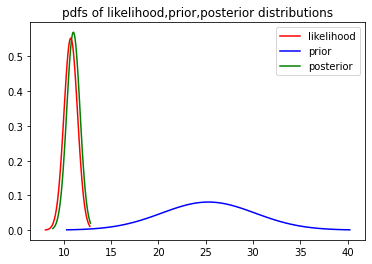

In [33]:
#plotting the pdfs of likelihood,prior and posterior distributions

plot2=plt.figure(2)
plt.title('pdfs of likelihood,prior,posterior distributions')

bin_centers1 = 0.5*(bins1[1:] + bins1[:-1])
den1 = pdf(bin_centers1,data1)
plt.plot(bin_centers1, den1 , label="likelihood",color='r')

bin_centers2 = 0.5*(bins2[1:] + bins2[:-1])
den2 = pdf(bin_centers2,data2)
plt.plot(bin_centers2, den2 , label="prior",color='b')

bin_centers3 = 0.5*(bins3[1:] + bins3[:-1])
den3 = posterior(bin_centers3)
plt.plot(bin_centers3, den3 , label="posterior",color='g')

plt.legend()

# Q2.b : Implementing the Metropolis algorithm

In [34]:
#prior function to return the probability of x in the prior distribution

def prior(x):
    
    #data2 is sampled from prior distribution
    
    return pdf(x,data2)

In [35]:
#likelihood function to return the probability of x in the likelihood distribution

def likelihood(x):
    
    #data2 is sampled from likelihood distribution
    
    return pdf(x,data1)

In [36]:
#transition model to generate the x_next based on the current x
#choosing transition model to be normal distribution with mean as x and standard deviation as sd

def proposal_model(x,sd):
    
    #returning x_new
    
    return np.random.normal(x,sd,1)

In [37]:
#acceptance function returns whether the x_new is accepted or not

def acceptance(x_pos,x_new_pos):
    
    r=x_new_pos/x_pos
    
    #if r is greater than 1 then x_new is accepted so we return true
    
    if r>=1:
        
        return True
   
    #if r is not greater than 1 
    
    else:
        
        #generate random no between 0 and 1
        
        accept=np.random.uniform(0,1)
        
        #return true if that number is less than r else false
        
        return (accept < r)

In [38]:
#defining metropolis algo

def metropolis_hastings(param_init,iterations,sd_for_transition_model):
    
    #initializing
    
    x = param_init
    accepted = []
    rejected = []   
    accepted_iter=[]
    
    #until the no of iterations are completed
    
    for i in range(iterations):
         
        #computing likelihood probability of x
        
        x_lik = likelihood(x)
        
        #computing prior probability of x
        
        x_prior = prior(x)
        
        #getting x_new from transition model
        
        x_new =  proposal_model(x,sd_for_transition_model)   
        
        #computing likelihood probability of x_new
        
        x_new_lik = likelihood(x_new)
        
        #computing prior probability of x_new
        
        x_new_prior=prior(x_new)
        
        #computing posterior probability(by excluding denominatior) of x
        
        x_po=x_lik * x_prior
        
        #computing posterior probability(by excluding denominatior) of x_new
        
        x_new_po=x_new_lik * x_new_prior
        
        #checking if the x_new is accepeted or not
        
        if (acceptance( x_po , x_new_po )): 
            
            #if x_new is accepted making x as x_new
            
            x = x_new
            
            #adding x_new to accepted list and iteration number to accepted iterations list
            
            accepted.append(x_new)
            accepted_iter.append(i)
            
        else:
            
            #adding x_new to rejected list
            
            rejected.append(x_new)            
                
    #returning the accepted and rejected arrays
    
    return np.array(accepted), np.array(rejected) , np.array(accepted_iter)

In [39]:
#running metropolis algo for 5000 iterations with initial value as 5 and sd for transition model as 1

accepted, rejected , accepted_iter = metropolis_hastings(5,5000,1)

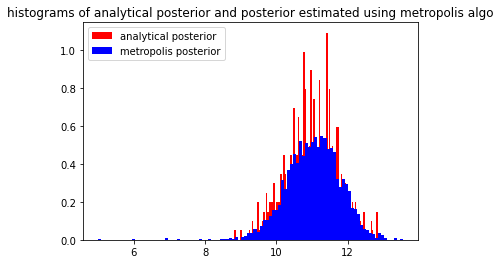

In [40]:
#plotting the histograms of analytical posterior and posterior estimated using metropolis algo

plot1=plt.figure(1)
plt.title('histograms of analytical posterior and posterior estimated using metropolis algo')

(values, bins1, _) = plt.hist(data3,bins=100,density=True,color='r',label="analytical posterior")
(values, bins2, _) = plt.hist(accepted,bins=100,density=True,color='b',label="metropolis posterior")

plt.legend()

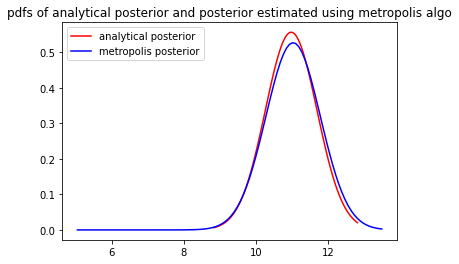

In [41]:
#plotting the pdfs of analytical posterior and posterior estimated using metropolis algo

plot2=plt.figure(2)
plt.title('pdfs of analytical posterior and posterior estimated using metropolis algo')

bin_centers1 = 0.5*(bins1[1:] + bins1[:-1])
den1 = pdf(bin_centers1,data3)
plt.plot(bin_centers1, den1 , label="analytical posterior",color='r')

bin_centers2 = 0.5*(bins2[1:] + bins2[:-1])
den2 = pdf(bin_centers2,accepted)
plt.plot(bin_centers2, den2 , label="metropolis posterior",color='b')

plt.legend()

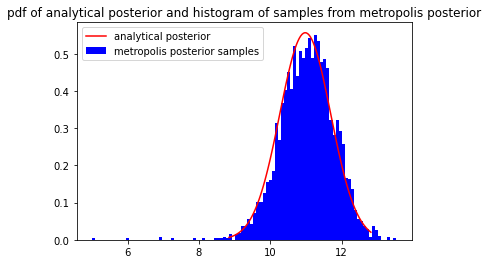

In [42]:
#plotting the pdf of analytical posterior and histogram of samples from posterior estimated using metropolis algo
#this is the plot asked in question

plot2=plt.figure(2)
plt.title('pdf of analytical posterior and histogram of samples from metropolis posterior')

bin_centers1 = 0.5*(bins1[1:] + bins1[:-1])
den1 = pdf(bin_centers1,data3)
plt.plot(bin_centers1, den1 , label="analytical posterior",color='r')

(values, bins2, _) = plt.hist(accepted,bins=100,density=True,color='b',label="metropolis posterior samples")

plt.legend()

# 2.C : finding optimal proposal width i.e sd of transition function

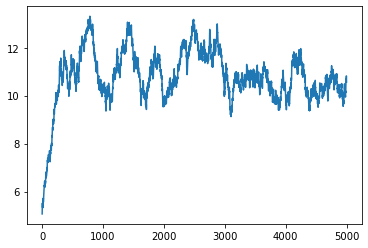

In [43]:
#running metropolis algo for very small(0.1) sd value of proposal distribution

accepted, rejected , accepted_iter = metropolis_hastings(5,5000,0.1)

#plotting trace of accepted values

plt.plot(accepted_iter,accepted)

### A first observation is that if  sd of proposal distribution is very small, then virtually all proposed moves will be accepted, but they will represent very small movements, so overall the chain will not mix well 

In [44]:
#PRINTING THE NO OF ACCEPTED AND REJECTED SAMPLE

print(len(accepted),len(rejected))

4695 305


### as you can see majority of the proposed samples got acceepted when sd is very less

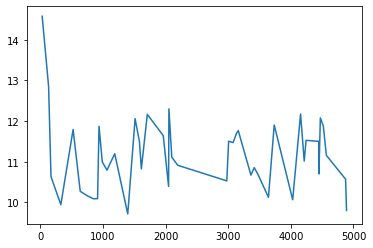

In [45]:
#running metropolis algo for large(100) sd value of proposal distribution

accepted, rejected , accepted_iter = metropolis_hastings(5,5000,100)

#plotting trace of accepted values

plt.plot(accepted_iter,accepted)

### Similarly, if sd of proposal distribution  is very large, then most moves will be rejected, so the chain will usually not move at all

In [46]:
#PRINTING THE NO OF ACCEPTED AND REJECTED SAMPLE

print(len(accepted),len(rejected))

44 4956


### as you can see majority of the proposed samples got rejected when sd is very high

## in this way the speed of convergence of sampling depends on proposal width i.e sd

## now optimal sd of proposal distribution is a value between the two extremes, thus allowing for reasonable sized proposal moves together with a reasonably high acceptance probability

## at the optimal sd value the number of accepted samples are almost same as the no of rejected samples

In [47]:
#initializing variables to store optimal sd and no of accepted and rejected samples for that optimal sd 

optimal_sd=0
optimal_sd_accepted=10000
optimal_sd_rejected=0
difference=[]

In [48]:
#list of sd values to find the optimal one

list_of_sd=[0.1,0.5,1,1.1,1.2,1.3,1.4,1.5,2,2.5,3,5,10,20,40]

In [49]:
#looping through different sd values

for i in list_of_sd:
    
    #getting accepted and rejected samples for each sd
    
    accepted, rejected , accepted_iter = metropolis_hastings(5,5000,i)
    
    diff=abs(len(accepted)-len(rejected))
    
    difference.append(diff)
    
    #finding optimal sd
    
    if diff<=abs(optimal_sd_accepted-optimal_sd_rejected):
        
        optimal_sd=i
        optimal_sd_accepted=len(accepted)
        optimal_sd_rejected=len(rejected)

optimal width of proposal distribution is:  1.5 
 the no of samples accepted using this optimal sd :  2417 
 the no of samples rejected using this optimal sd :  2583


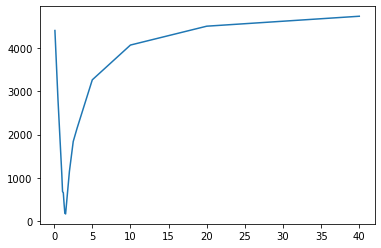

In [50]:
#plotting how the difference between accepted and rejected sample changes with sd

plt.plot(list_of_sd,difference)


#printing optimal sd

print('optimal width of proposal distribution is: ',optimal_sd,'\n',
      'the no of samples accepted using this optimal sd : ',optimal_sd_accepted,'\n',
      'the no of samples rejected using this optimal sd : ',optimal_sd_rejected)

### as you can see the no of accepted samples and no of rejected samples are almost same for this optimal width

### we can also say that optimal sd is the sd of proposal distribution that gives the Acceptance Rate as close to 0.5
### acceptance rate is the ratio of no of accepted samples to no of proposed samples